# Домашнее задание №1


__Выполнила: Евсикова Дарья Алексеевна__


__МОиАД, 1 курс__

________________________________

__В работе рассмотрены:__
* Метод золотого сечения
* Метод парабол
* Комбинация метода парабол и золотого сечения

__Для каждого из методов проанализированы:__
* Поведение на унимодальных функциях и функциях, не являющихся унимодальными
* Зависимость времени работы алгоритма от точности
* Зависимость количества итераций от точности
_______________________________

### 1. Метод золотого сечения

In [1]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from time import perf_counter

#### Реализация

In [99]:
# Реализация метода золотого сечения

def golden_ratio_opt(f, a: float, b: float, eps: float = 1e-8):
    t1 = perf_counter() #для подсчета времени работы
    K = (np.sqrt(5) - 1) / 2 
    I = K * (b - a)
    n = 0
    x_b, x_a = a + I, b - I
    f_a, f_b = f(x_a)[0], f(x_b)[0]
    
    while I >= eps:
        I = K * I
        n += 1
        
        if f_a >= f_b:
            a = x_a
            x_a = x_b
            x_b = a + I 
            f_a, f_b = f_b, f(x_b)[0]
            
        else:
            b = x_b
            x_b = x_a
            x_a = b - I
            f_a, f_b = f(x_a)[0], f_a
    
    if f_a <= f_b:
        t2 = perf_counter()
        return  x_a, f_a, n, t2 - t1
    
    else:
        t2 = perf_counter()
        return x_b, f_b, n, t2 - t1
    

#### Рассмотрим, как работает построенный алгоритм для некоторых оракулов:

1. $f(x) = \dfrac {x ^ 2}{2}$

In [100]:
# оракул 1
def f(x):
    return x ** 2 / 2, x

Определим с помощью алгоритма золотого сечения минимум и изобразим его на графике

In [103]:
# начальные точки
init_xa, init_xb = -3, 5

Локальный минимум: x* = 0.0; f(x*) = 0.0


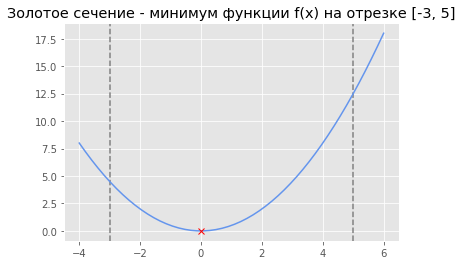

In [104]:
# считаем x,y для построения графика
x = np.linspace(init_xa - 1, init_xb + 1)
y = f(x)[0]
plt.axvline(x=init_xa, color="gray", linestyle="--")
plt.axvline(x=init_xb, color="gray", linestyle="--")
plt.plot(x, y, color="cornflowerblue")

xa, fa, n, t = golden_ratio_opt(f, init_xa, init_xb) # считаем минимум функции f(x)

plt.plot(xa, fa, "rx")
plt.title('Золотое сечение - минимум функции f(x) на отрезке [' + str(init_xa) + ', '  + str(init_xb) + ']')
print('Локальный минимум: x* = ' + str(np.around(xa,3)) + '; f(x*) = ' + str(np.around(fa,3)))
plt.show()

Рассмотрим зависимость необходимого количества итераций для заданной точности

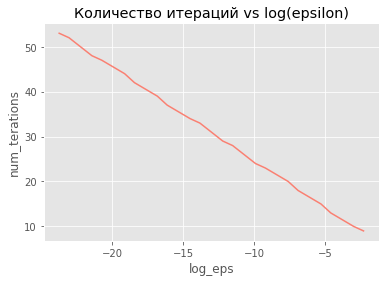

In [105]:
# Построение графика кол-во итераций vs log(epsilon)

# задаем точность от 1e-10 до 1e-1
accuracy = np.sort(np.array([10 ** (-(10-i))/j   for i in range(10) for j in range(1,3)]))

# рассчитываем количество итераций при каждом эпсилон
num_iter = [golden_ratio_opt(f, init_xa, init_xb, eps)[2] for eps in accuracy]

log_accuracy = np.log(accuracy)

plt.plot(log_accuracy, num_iter, color="salmon")
plt.xlabel('log_eps')
plt.ylabel('num_terations')
plt.title('Количество итераций vs log(epsilon)')
plt.show()

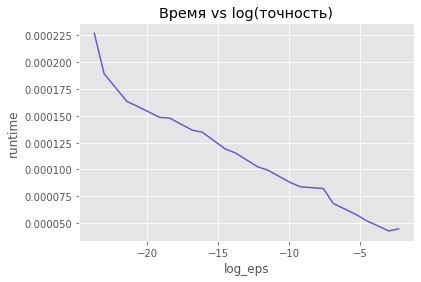

In [106]:
# рассчитаем время работы в зависимости от эпсилон
times = [golden_ratio_opt(f, init_xa, init_xb, eps)[3] for eps in accuracy]

plt.plot(log_accuracy, times, color="slateblue")
plt.xlabel('log_eps')
plt.ylabel('runtime')
plt.title('Время vs log(точность)')
plt.show()

<br><br>
<br><br>
2. $f(x) = \sin{x} + \sin{(\frac{10}{3} x)}$

Данная функция для $x\in$ [2.7, 7.5] унимодальной не является

In [111]:
# оракул 2
def f(x):
    return np.sin(x) + np.sin(10/3 * x), x

In [112]:
# начальные точки
init_xa, init_xb = 2.7, 7.5

Локальный минимум: x* = 5.146; f(x*) = -1.9


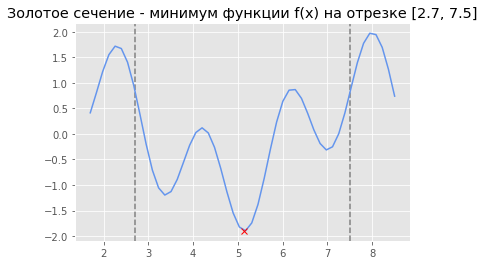

In [113]:
# считаем x,y для построения графика
x = np.linspace(init_xa - 1, init_xb + 1)
y = f(x)[0]
plt.axvline(x=init_xa, color="gray", linestyle="--")
plt.axvline(x=init_xb, color="gray", linestyle="--")
plt.plot(x, y, color="cornflowerblue")
xa, fa, n, t = golden_ratio_opt(f, init_xa, init_xb)
plt.plot(xa, fa, "rx")
plt.title('Золотое сечение - минимум функции f(x) на отрезке [' + str(init_xa) + ', '  + str(init_xb) + ']')
print('Локальный минимум: x* = ' + str(np.around(xa,3)) + '; f(x*) = ' + str(np.around(fa,3)))
plt.show()

Таким образом, метод золотого сечения нашел __один из локальных минимумов__, который оказался и глобальным минимумом на отрезке

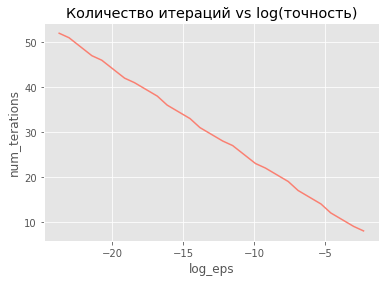

In [114]:
# Построение графика кол-во итераций vs log(точность)

# задаем точность от 1e-10 до 1e-1
accuracy = np.sort(np.array([10 ** (-(10-i))/j   for i in range(10) for j in range(1,3)]))

# рассчитываем количество итераций при каждом эпсилон
num_iter = [golden_ratio_opt(f, init_xa, init_xb, eps)[2] for eps in accuracy]

log_accuracy = np.log(accuracy)

plt.plot(log_accuracy, num_iter, color="salmon")
plt.xlabel('log_eps')
plt.ylabel('num_terations')
plt.title('Количество итераций vs log(точность)')
plt.show()

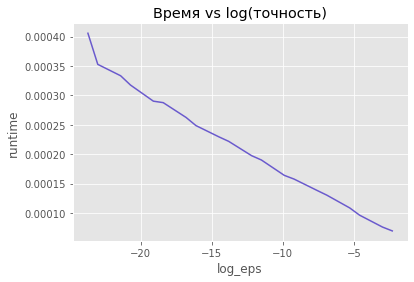

In [115]:
# рассчитаем время работы в зависимости от эпсилон
times = [golden_ratio_opt(f, init_xa, init_xb, eps)[3] for eps in accuracy]

plt.plot(log_accuracy, times, color="slateblue")
plt.xlabel('log_eps')
plt.ylabel('runtime')
plt.title('Время vs log(точность)')
plt.show()

<br><br>
<br><br>
3. $f(x) = -e^{-x} \cdot \sin{2 \pi x}$

Данная функция также не является унимодальной для $x\in$ [0, 4] 

In [119]:
# оракул 3
def f(x):
    return -np.exp(-x) * np.sin(2 * np.pi * x), x

In [124]:
# начальные точки
init_xa, init_xb = 0, 4

Локальный минимум: x* = 3.225; f(x*) = -0.039


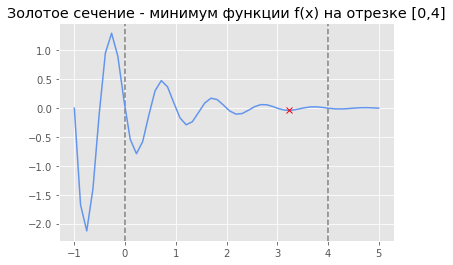

In [125]:
# считаем x,y для построения графика
x = np.linspace(init_xa - 1, init_xb + 1)
y = f(x)[0]
plt.axvline(x=init_xa, color="gray", linestyle="--")
plt.axvline(x=init_xb, color="gray", linestyle="--")
plt.plot(x, y, color="cornflowerblue")
xa, fa, n, t = golden_ratio_opt(f, init_xa, init_xb)
plt.plot(xa, fa, "rx")
plt.title('Золотое сечение - минимум функции f(x) на отрезке [' + str(init_xa) + ','  + str(init_xb) + ']')
print('Локальный минимум: x* = ' + str(np.around(xa,3)) + '; f(x*) = ' + str(np.around(fa,3)))
plt.show()

Таким образом, метод золотого сечения нашел __один из локальных минимумов__, который в действительности не является минимальным на интервале

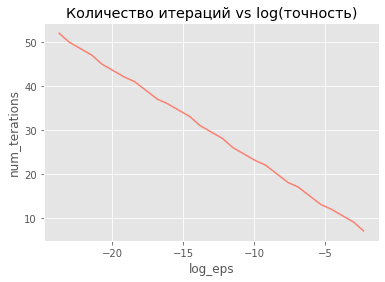

In [126]:
# Построение графика кол-во итераций vs log(точность)

# задаем точность от 1e-10 до 1e-1
accuracy = np.sort(np.array([10 ** (-(10-i))/j   for i in range(10) for j in range(1,3)]))

# рассчитываем количество итераций при каждом эпсилон
num_iter = [golden_ratio_opt(f, init_xa, init_xb, eps)[2] for eps in accuracy]

log_accuracy = np.log(accuracy)

plt.plot(log_accuracy, num_iter, color="salmon")
plt.xlabel('log_eps')
plt.ylabel('num_terations')
plt.title('Количество итераций vs log(точность)')
plt.show()

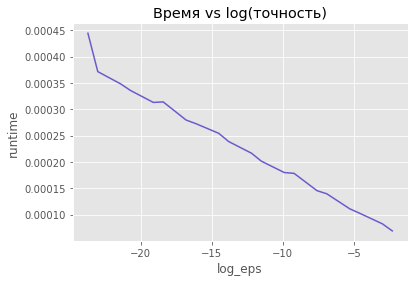

In [128]:
# рассчитаем время работы в зависимости от эпсилон
times = [golden_ratio_opt(f, init_xa, init_xb, eps)[3] for eps in accuracy]

plt.plot(log_accuracy, times, color="slateblue")
plt.xlabel('log_eps')
plt.ylabel('runtime')
plt.title('Время vs log(точность)')
plt.show()

#### Таким образом, из приведенных графиков видно, что сходимость достигается за линейное время

Данный метод работает и для неунимодальных функций, стабильно выдает один из локальных минимумов

Сравним результаты полученные для метода золотого сечения с результатами, полученными по методу парабол

<br><br>
<br><br>
### 2. Метод парабол

In [49]:
# Реализация метода

def quadratic_opt(f, a: float, b: float, eps: float = 1e-8):
    
    t1 = perf_counter() # для подсчета времени
    
    x1, x3 = a, b
    x2 = (x1 + x3) / 2
    
    f1, f2, f3 = f(x1)[0], f(x2)[0], f(x3)[0] 
    
    # количество вызовов оракула
    n = 3
    
    # считаем вершину параболы
    x = (x2 - 
        ((x2 - x1) ** 2 * (f2 - f3) - (x2 - x3) ** 2 * (f2 - f1)) 
        /
        (2 * ((x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1)) + 1e-10))
    
    fx = f(x)[0]
    
    
    # пересчитываем новые 3 точки    
    if x1 <= x <= x2 and fx >= f2: # x* in [x, x3] 
        f1 = fx
        x1 = x
            
    elif x1 <= x <= x2 and fx < f2: # x* in [x1, x2]
        f3 = f2
        x3 = x2
        x2 = x
        f2 = fx

    elif x2 <= x <= x3 and fx >= f2: # x* in [x1, x]
        f3 = fx
        x3 = x

    elif x2 <= x <= x3 and fx < f2: # x* in [x2, x3]
        f1 = f2
        x1 = x2
        f2 = fx
        x2 = x

    # новая аппроксимация параболой         
    x_k = (x2 - 
        ((x2 - x1) ** 2 * (f2 - f3) - (x2 - x3) ** 2 * (f2 - f1)) 
        /
        (2 * ((x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1)) + 1e-10))

    fk = f(x_k)[0]
    n += 1
    
    
    # проверяем условие сходимости
    while abs(x_k - x) > eps:
        
        n += 1
        x = x_k
        fx = fk
        
        if x1 <= x <= x2 and fx >= f2: # x* in [x, x3] 
            f1 = fx
            x1 = x
            
        elif x1 <= x <= x2 and fx < f2: # x* in [x1, x2]
            f3 = f2
            x3 = x2
            x2 = x
            f2 = fx
        
        elif x2 <= x <= x3 and fx >= f2: # x* in [x1, x]
            f3 = fx
            x3 = x
        
        elif x2 <= x <= x3 and fx < f2: # x* in [x2, x3]
            f1 = f2
            x1 = x2
            f2 = fx
            x2 = x
        
        # новая аппроксимация параболой         
        x_k = (x2 - 
            ((x2 - x1) ** 2 * (f2 - f3) - (x2 - x3) ** 2 * (f2 - f1)) 
            /
            (2 * ((x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1)) + 1e-10))
        
        fk = f(x_k)[0]
        
    t2 = perf_counter()
        
    return x_k, fk, n, t2 - t1

#### Рассмотрим работу метода на тех же оракулах, что и для метода золотого сечения:

Унимодальная функция
1. $f(x) = \dfrac {x ^ 2}{2}$

In [129]:
# оракул 1
def f(x):
    return x ** 2 / 2, x

In [130]:
# начальные точки
init_xa, init_xb = -3, 5

Локальный минимум: x* = 0.0; f(x*) = 0.0


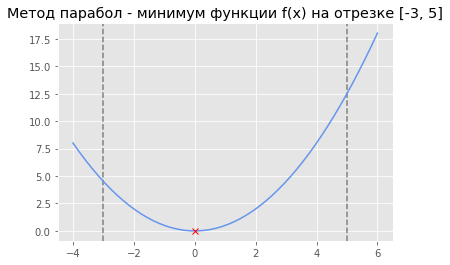

In [131]:
# считаем x,y для построения графика
x = np.linspace(init_xa - 1, init_xb + 1)
y = f(x)[0]
plt.axvline(x=init_xa, color="gray", linestyle="--")
plt.axvline(x=init_xb, color="gray", linestyle="--")
plt.plot(x, y, color="cornflowerblue")

xa, fa, n, t = quadratic_opt(f, init_xa, init_xb)
plt.plot(xa, fa, "rx")
plt.title('Метод парабол - минимум функции f(x) на отрезке [' + str(init_xa) + ', '  + str(init_xb) + ']')
print('Локальный минимум: x* = ' + str(np.around(xa,3)) + '; f(x*) = ' + str(np.around(fa,3)))
plt.show()

Таким образом,метод парабол также __сходится к локальному минимуму для унимодальных функций__

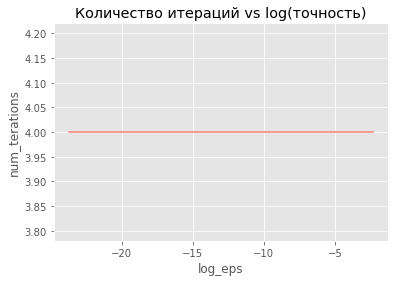

In [132]:
# Построение графика кол-во итераций vs log(точность)

# задаем точность от 1e-10 до 1e-1
accuracy = np.sort(np.array([10 ** (-(10-i))/j   for i in range(10) for j in range(1,3)]))

# рассчитываем количество итераций при каждом эпсилон
num_iter = [quadratic_opt(f, init_xa, init_xb, eps)[2] for eps in accuracy]

log_accuracy = np.log(accuracy)

plt.plot(log_accuracy, num_iter, color="salmon")
plt.xlabel('log_eps')
plt.ylabel('num_terations')
plt.title('Количество итераций vs log(точность)')
plt.show()

Метод парабол при разных уровнях точности для данной функции гарантированно находит минимум за 4 вызова оракула

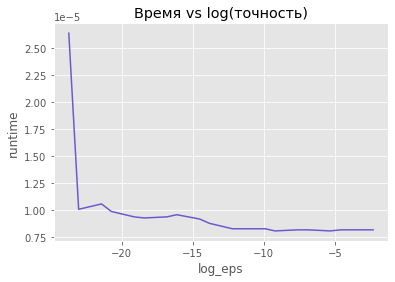

In [133]:
# рассчитаем время работы в зависимости от эпсилон
times = [quadratic_opt(f, init_xa, init_xb, eps)[3] for eps in accuracy]

plt.plot(log_accuracy, times, color="slateblue")
plt.xlabel('log_eps')
plt.ylabel('runtime')
plt.title('Время vs log(точность)')
plt.show()

Данный график демонстрирует квадратичную сходимость метода

<br><br>
<br><br>
Рассмотрим также неунимодальные функции
2. $f(x) = \sin{x} + \sin{(\frac{10}{3} x)}$

Данная функция для $x\in$ [2.7, 7.5] унимодальной не является

In [134]:
# оракул 2
def f(x):
    return np.sin(x) + np.sin(10/3 * x), x

In [ ]:
# начальные точки
init_xa, init_xb = 2.7, 7.5

Локальный минимум: x* = 5.146; f(x*) = -1.9


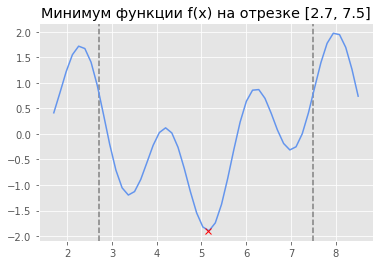

In [135]:
# считаем x,y для построения графика
x = np.linspace(init_xa - 1, init_xb + 1)
y = f(x)[0]
plt.axvline(x=init_xa, color="gray", linestyle="--")
plt.axvline(x=init_xb, color="gray", linestyle="--")
plt.plot(x, y, color="cornflowerblue")

xa, fa, n, t = quadratic_opt(f, init_xa, init_xb)
plt.plot(xa, fa, "rx")
plt.title('Минимум функции f(x) на отрезке [' + str(init_xa) + ', '  + str(init_xb) + ']')
print('Локальный минимум: x* = ' + str(np.around(xa,3)) + '; f(x*) = ' + str(np.around(fa,3)))
plt.show()

Таким образом, метод парабол нашел __один из локальных минимумов__, который является и глобальным

Рассмотрим графики зависимости точности от количества итераций и времени исполнения

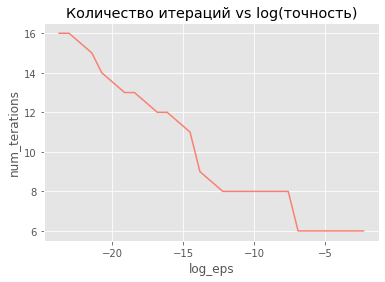

In [140]:
# Построение графика кол-во итераций vs log(точность)

# задаем точность от 1e-10 до 1e-1
accuracy = np.sort(np.array([10 ** (-(10-i))/j   for i in range(10) for j in range(1,3)]))

# рассчитываем количество итераций при каждом эпсилон
num_iter = [quadratic_opt(f, init_xa, init_xb, eps)[2] for eps in accuracy]

log_accuracy = np.log(accuracy)

plt.plot(log_accuracy, num_iter, color="salmon")
plt.xlabel('log_eps')
plt.ylabel('num_terations')
plt.title('Количество итераций vs log(точность)')
plt.show()

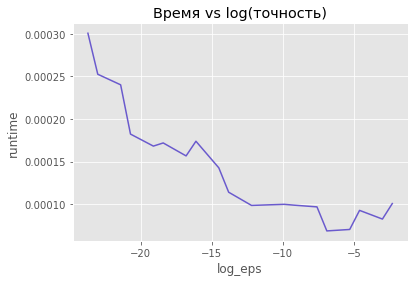

In [139]:
# рассчитаем время работы в зависимости от эпсилон
times = [quadratic_opt(f, init_xa, init_xb, eps)[3] for eps in accuracy]

plt.plot(log_accuracy, times, color="slateblue")
plt.xlabel('log_eps')
plt.ylabel('runtime')
plt.title('Время vs log(точность)')
plt.show()

* На неунимодальных функциях метод ведет себя похуже, чем в унимодальном случае. Сходимость достигается медленнее
* Однако, количество итераций, требуемых для заданной точности, явно меньше, чем в методе золотого сечения

### Выводы:
* Метод золотого сечения работает в среднем медленнее, чем метод парабол на тех же функциях
* Оба метода сходятся на неунимодальных функциях к одному из локальных минимумов
* Метод золотого сечения более предпочтителен в точности, так как он гарантированно сойдется к одному из минимумов
* Метод парабол может "застрять" на некоторых функциях, очень медленно сокращая интервал поиска

## 3. Метод парабол + золотое сечение

Рассмотрим небольшую модификацию метода парабол

Метод парабол довольно быстро сходится на унимодальных функциях, но его работа зависит от выбора третьей точки в неунимодальном случае. 
Метод золотого сечения гарантированно сходится, но за большее количество итераций.

Поэтому можно при подсчете третьей точки в методе парабол, сравнить значение функции в ней и значения в концах интервала. 
Если функция оказалась неунимодальной, запускаем метод золотого сечения. Иначе - метод парабол.

In [142]:
# Реализация метода

def new_quadratic_opt(f, a: float, b: float, eps: float = 1e-8):
    
    t1 = perf_counter() # для подсчета времени
    
    x1, x3 = a, b
    x2 = (x1 + x3) / 2
    
    f1, f2, f3 = f(x1)[0], f(x2)[0], f(x3)[0] 
    
    # количество вызовов оракула
    n = 3
    
    # ДОБАВЛЕНО - если функция неунимодальная - вызываем метод золотого сечения  
    if f2 > f3 and f2 > f1:
        t2 = perf_counter()
        xk, fk, nk, tk = golden_ratio_opt(f, a, b, eps)
        
        return xk, fk, nk + n, t2 - t1 + tk
    
    # для унимодальных считаем вершину параболы
    x = (x2 - 
        ((x2 - x1) ** 2 * (f2 - f3) - (x2 - x3) ** 2 * (f2 - f1)) 
        /
        (2 * ((x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1)) + 1e-10))
    
    fx = f(x)[0]
    
    
    # пересчитываем новые 3 точки    
    if x1 <= x <= x2 and fx >= f2: # x* in [x, x3] 
        f1 = fx
        x1 = x
            
    elif x1 <= x <= x2 and fx < f2: # x* in [x1, x2]
        f3 = f2
        x3 = x2
        x2 = x
        f2 = fx

    elif x2 <= x <= x3 and fx >= f2: # x* in [x1, x]
        f3 = fx
        x3 = x

    elif x2 <= x <= x3 and fx < f2: # x* in [x2, x3]
        f1 = f2
        x1 = x2
        f2 = fx
        x2 = x

    # новая аппроксимация параболой         
    x_k = (x2 - 
        ((x2 - x1) ** 2 * (f2 - f3) - (x2 - x3) ** 2 * (f2 - f1)) 
        /
        (2 * ((x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1)) + 1e-10))

    fk = f(x_k)[0]
    n += 1
    
    
    # проверяем условие сходимости
    while abs(x_k - x) > eps:
        
        n += 1
        x = x_k
        fx = fk
        
        if x1 <= x <= x2 and fx >= f2: # x* in [x, x3] 
            f1 = fx
            x1 = x
            
        elif x1 <= x <= x2 and fx < f2: # x* in [x1, x2]
            f3 = f2
            x3 = x2
            x2 = x
            f2 = fx
        
        elif x2 <= x <= x3 and fx >= f2: # x* in [x1, x]
            f3 = fx
            x3 = x
        
        elif x2 <= x <= x3 and fx < f2: # x* in [x2, x3]
            f1 = f2
            x1 = x2
            f2 = fx
            x2 = x
        
        # новая аппроксимация параболой         
        x_k = (x2 - 
            ((x2 - x1) ** 2 * (f2 - f3) - (x2 - x3) ** 2 * (f2 - f1)) 
            /
            (2 * ((x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1)) + 1e-10))
        
        fk = f(x_k)[0]
        
    t2 = perf_counter()
        
    return x_k, fk, n, t2 - t1

<br><br>
### Рассмотрим поведение для неунимодальной функции
$f(x) = \sin{x} + \sin{(\frac{10}{3} x)}$

Данная функция для $x\in$ [2.7, 7.5] унимодальной не является

In [141]:
def f(x):
    return np.sin(x) + np.sin(10/3 * x), x

In [143]:
# начальные точки
init_xa, init_xb = 2.7, 7.5

Локальный минимум: x* = 5.146; f(x*) = -1.9


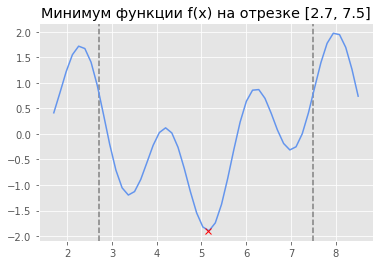

In [144]:
# считаем x,y для построения графика
x = np.linspace(init_xa - 1, init_xb + 1)
y = f(x)[0]
plt.axvline(x=init_xa, color="gray", linestyle="--")
plt.axvline(x=init_xb, color="gray", linestyle="--")
plt.plot(x, y, color="cornflowerblue")

xa, fa, n, t = new_quadratic_opt(f, init_xa, init_xb)
plt.plot(xa, fa, "rx")
plt.title('Минимум функции f(x) на отрезке [' + str(init_xa) + ', '  + str(init_xb) + ']')
print('Локальный минимум: x* = ' + str(np.around(xa,3)) + '; f(x*) = ' + str(np.around(fa,3)))
plt.show()

Рассмотрим графики зависимости точности от количества итераций и времени исполнения

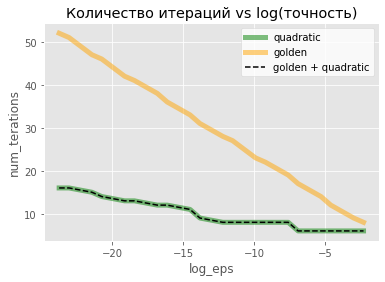

In [148]:
# Построение графика кол-во итераций vs log(точность)

# задаем точность от 1e-10 до 1e-1
accuracy = np.sort(np.array([10 ** (-(10-i))/j   for i in range(10) for j in range(1,3)]))

# рассчитываем количество итераций при каждом эпсилон
num_iter_nq = [new_quadratic_opt(f, init_xa, init_xb, eps)[2] for eps in accuracy]
num_iter_q = [quadratic_opt(f, init_xa, init_xb, eps)[2] for eps in accuracy]
num_iter_g = [golden_ratio_opt(f, init_xa, init_xb, eps)[2] for eps in accuracy]

log_accuracy = np.log(accuracy)


plt.plot(log_accuracy, num_iter_q, color="green", linewidth=5.0, alpha = 0.5, label = 'quadratic')
plt.plot(log_accuracy, num_iter_g, color="orange", linewidth=5.0, alpha = 0.5, label = 'golden')
plt.plot(log_accuracy, num_iter_nq, color="black", linestyle='--', label = 'golden + quadratic')
plt.legend(facecolor='white')

plt.xlabel('log_eps')
plt.ylabel('num_terations')
plt.title('Количество итераций vs log(точность)')
plt.show()

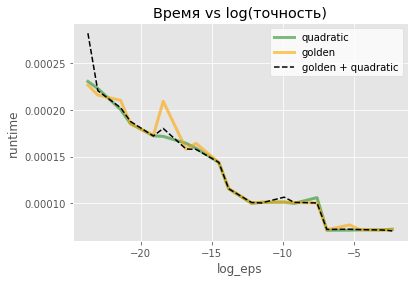

In [98]:
# рассчитаем время работы в зависимости от эпсилон
time_nq = [new_quadratic_opt(f, init_xa, init_xb, eps)[3] for eps in accuracy]
time_q = [quadratic_opt(f, init_xa, init_xb, eps)[3] for eps in accuracy]
time_g = [new_quadratic_opt(f, init_xa, init_xb, eps)[3] for eps in accuracy]


plt.plot(log_accuracy, time_q, color="green", linewidth=3.0, alpha = 0.5, label = 'quadratic')
plt.plot(log_accuracy, time_g, color="orange", linewidth=3.0, alpha = 0.6, label = 'golden')
plt.plot(log_accuracy, time_nq, color="black", linestyle='--', label = 'golden + quadratic')
plt.legend(facecolor='white')


plt.xlabel('log_eps')
plt.ylabel('runtime')
plt.title('Время vs log(точность)')
plt.show()

Дополнительно построим график зависимости длины интервала от количества итераций и времени

In [153]:
# Модифицируем функцию, чтобы запоминать длину интервала

def for_plot(f, a: float, b: float, eps: float = 1e-8):
    
    t1 = perf_counter() 
    
    x1, x3 = a, b
    x2 = (x1 + x3) / 2
    
    f1, f2, f3 = f(x1)[0], f(x2)[0], f(x3)[0] 
    
    n = 3
    
    if f2 > f3 and f2 > f1:
        t2 = perf_counter()
        xk, fk, nk, tk = golden_ratio_opt(f, a, b, eps)
        
        return xk, fk, nk + n, t2 - t1 + tk
    
    x = (x2 - 
        ((x2 - x1) ** 2 * (f2 - f3) - (x2 - x3) ** 2 * (f2 - f1)) 
        /
        (2 * ((x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1)) + 1e-10))
    
    fx = f(x)[0]
    
    if x1 <= x <= x2 and fx >= f2: # x* in [x, x3] 
        f1 = fx
        x1 = x
            
    elif x1 <= x <= x2 and fx < f2: # x* in [x1, x2]
        f3 = f2
        x3 = x2
        x2 = x
        f2 = fx

    elif x2 <= x <= x3 and fx >= f2: # x* in [x1, x]
        f3 = fx
        x3 = x

    elif x2 <= x <= x3 and fx < f2: # x* in [x2, x3]
        f1 = f2
        x1 = x2
        f2 = fx
        x2 = x

    x_k = (x2 - 
        ((x2 - x1) ** 2 * (f2 - f3) - (x2 - x3) ** 2 * (f2 - f1)) 
        /
        (2 * ((x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1)) + 1e-10))

    fk = f(x_k)[0]
    n += 1
    
#     added
    global num_iter_for_plot, time_for_plot
    
    num_iter_for_plot += [[abs(x_k - x), n]]
    time_for_plot += [[abs(x_k - x), perf_counter() - t1]]
    
    while abs(x_k - x) > eps:
        
        n += 1
        x = x_k
        fx = fk
        
        if x1 <= x <= x2 and fx >= f2: # x* in [x, x3] 
            f1 = fx
            x1 = x
            
        elif x1 <= x <= x2 and fx < f2: # x* in [x1, x2]
            f3 = f2
            x3 = x2
            x2 = x
            f2 = fx
        
        elif x2 <= x <= x3 and fx >= f2: # x* in [x1, x]
            f3 = fx
            x3 = x
        
        elif x2 <= x <= x3 and fx < f2: # x* in [x2, x3]
            f1 = f2
            x1 = x2
            f2 = fx
            x2 = x
        
        # новая аппроксимация параболой         
        x_k = (x2 - 
            ((x2 - x1) ** 2 * (f2 - f3) - (x2 - x3) ** 2 * (f2 - f1)) 
            /
            (2 * ((x2 - x1) * (f2 - f3) - (x2 - x3) * (f2 - f1)) + 1e-10))
        
        fk = f(x_k)[0]
        
        num_iter_for_plot += [[abs(x_k - x), n]]
        time_for_plot += [[abs(x_k - x), perf_counter() - t1]]
        
    t2 = perf_counter()
        
    return x_k, fk, n, t2 - t1

In [167]:
# данные для графиков

time_for_plot = []
num_iter_for_plot = []
opt = for_plot(f, init_xa, init_xb)

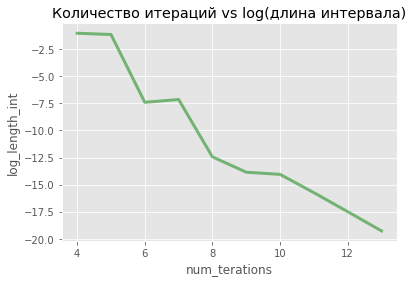

In [170]:
n_x = [i[0] for i in num_iter_for_plot]
n_y = [i[1] for i in num_iter_for_plot]
t_x = [i[0] for i in time_for_plot]
t_y = [i[1] for i in time_for_plot]


log_accuracy = np.log(n_x)

plt.plot(n_y, log_accuracy, color="green", linewidth=3.0, alpha = 0.5)

plt.ylabel('log_length_int')
plt.xlabel('num_terations')
plt.title('Количество итераций vs log(длина интервала)')
plt.show()

За 12 вызовов оракула алгоритм сошелся к минимуму с нужной точностью

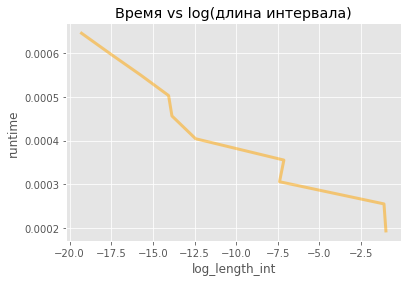

In [173]:
plt.plot(log_accuracy, t_y, color="orange", linewidth=3.0, alpha = 0.5)

plt.xlabel('log_length_int')
plt.ylabel('runtime')
plt.title('Время vs log(длина интервала)')
plt.show()

За 0.0006 секунд алгоритм сошелся к минимуму с нужной точностью

### Выводы:
* Данная элементарная комбинация двух методов не проигрывает во времени и количестве итераций на унимодальных функциях
* Метод гарантированно сходится к одному из локальных минимумов в неунимодальном случае
* Лучшей модификацией возможно стал бы метод Брента